In [16]:

import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np
from utils import PathUtils

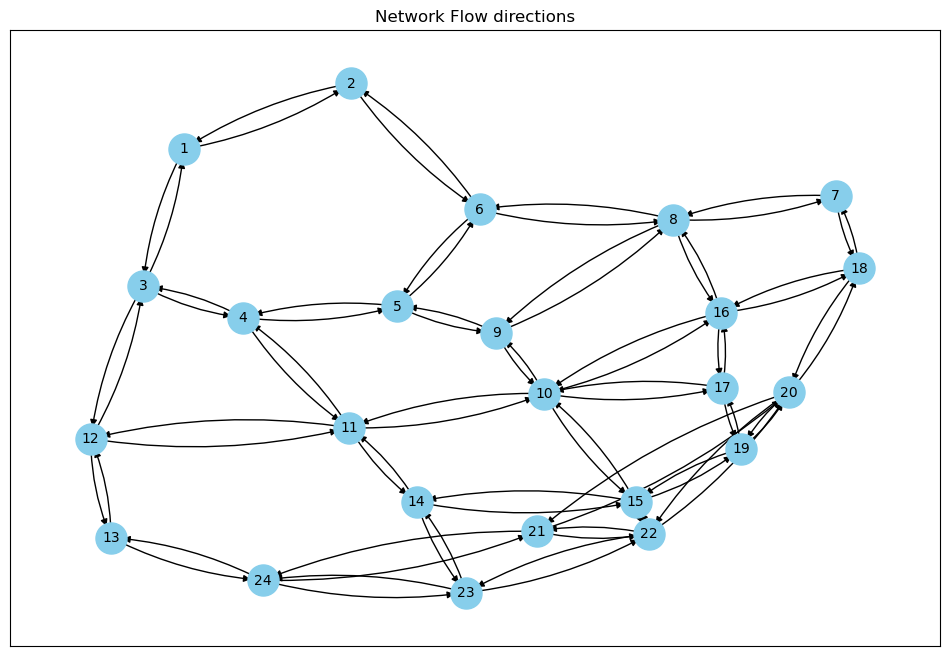

In [17]:
# Read the data from the file
filename = 'res2.txt'
edges = []

with open(filename, 'r') as file:
    lines = file.readlines()
    
    # Skip the initial metadata lines
    data_start_index = 5 # Assuming the first 4 lines are metadata
    for line in lines[data_start_index:]:
        parts = line.strip().split()
        if len(parts) == 4:
            init_node = parts[0]
            term_node = parts[1]
            flow = round(float(parts[2]),2)
            travel_time = float(parts[3])
            edges.append((init_node, term_node, flow))

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Get edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
rad = 0.1
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', arrows=True, connectionstyle=f'arc3,rad={rad}')
# no edge labels, misleading
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')


plt.title('Network Flow directions')
plt.show()

In [24]:
# calculate time of travel for each OD pair

trips_file = str(PathUtils.sioux_falls_trips_file)

# Read the data from the file
filename = trips_file
OD_pairs = []

with open(filename, 'r') as file:
    lines = file.readlines()
    
    # Skip the initial metadata lines
    data_start_index = 5 # Assuming the first line is metadata
    # OD pairs are in format
    # Origin x
    # D1: flow; D2: flow; ...; Dn: flow
    # for each destination, flow can be 0, then it is not listed
    O = None
    D = None
    for line in lines[data_start_index:]:
        if line.strip() == '':
            continue
        if line.strip().split()[0] == 'Origin':
            O = int(line.strip().split()[1])    
            continue
        for part in line.strip().split(';'):
            if part.strip() == '':
                continue
            D = int(part.split(':')[0].strip())
            flow = float(part.split(':')[1].strip())
            if flow > 0:
                OD_pairs.append((O, D, flow))
                
for pair in OD_pairs:
    print(f'OD pair: {pair[0]} -> {pair[1]}')
    print(f'Flow: {pair[2]}')
    path = nx.shortest_path(G, str(pair[0]), str(pair[1]), weight='weight')
    
    total_time = 0
    for i in range(len(path) - 1):
        total_time += G[path[i]][path[i+1]]['weight']
        
    print(f'Total time: {total_time}')

OD pair: 1 -> 2
Flow: 100.0
Total time: 4499.32
OD pair: 1 -> 3
Flow: 100.0
Total time: 8109.38
OD pair: 1 -> 4
Flow: 500.0
Total time: 22226.16
OD pair: 1 -> 5
Flow: 200.0
Total time: 19258.34
OD pair: 1 -> 6
Flow: 300.0
Total time: 10475.57
OD pair: 1 -> 7
Flow: 500.0
Total time: 35037.23
OD pair: 1 -> 8
Flow: 800.0
Total time: 22953.08
OD pair: 1 -> 9
Flow: 500.0
Total time: 29857.370000000003
OD pair: 1 -> 10
Flow: 1300.0
Total time: 42380.89
OD pair: 1 -> 11
Flow: 500.0
Total time: 26637.8
OD pair: 1 -> 12
Flow: 200.0
Total time: 18245.51
OD pair: 1 -> 13
Flow: 500.0
Total time: 30663.809999999998
OD pair: 1 -> 14
Flow: 300.0
Total time: 36446.17
OD pair: 1 -> 15
Flow: 500.0
Total time: 45491.32
OD pair: 1 -> 16
Flow: 500.0
Total time: 31312.04
OD pair: 1 -> 17
Flow: 400.0
Total time: 42952.93
OD pair: 1 -> 18
Flow: 100.0
Total time: 46722.880000000005
OD pair: 1 -> 19
Flow: 300.0
Total time: 52893.729999999996
OD pair: 1 -> 20
Flow: 300.0
Total time: 58257.38
OD pair: 1 -> 21
Flo